<a href="https://colab.research.google.com/github/KimTaesong/AI_project/blob/master/3_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3-1 소스코드

In [ ]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import pydot
import h5py

import tensorflow
import keras

print('scipy ' + scipy.__version__)
print('numpy ' + numpy.__version__)
print('matplotlib ' + matplotlib.__version__)
print('pandas ' + pandas.__version__)
print('sklearn ' + sklearn.__version__)
print('h5py ' + h5py.__version__)

print('tensorflow ' + tensorflow.__version__)
print('keras ' + keras.__version__)

scipy 1.4.1
numpy 1.18.4
matplotlib 3.2.1
pandas 1.0.3
sklearn 0.22.2.post1
h5py 2.10.0
tensorflow 2.2.0
keras 2.3.1


Using TensorFlow backend.


3-2 소스코드

In [ ]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# 1. 데이터셋 생성하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=5, batch_size=32)

# 5. 학습과정 살펴보기
print('## training losa and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 7. 모델 사용하기
xhat = X_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.6643 - accuracy: 0.8305
Epoch 2/5
60000/60000 [==============================] - 2s 42us/step - loss: 0.3467 - accuracy: 0.9020
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.2988 - accuracy: 0.9151
Epoch 4/5
60000/60000 [==============================] - 2s 42us/step - loss: 0.2692 - accuracy: 0.9229
Epoch 5/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.2468 - accuracy: 0.9304
## training losa and acc ##
[0.6643477130572001, 0.3467264474630356, 0.2987920984387398, 0.26923828569054603, 0.24675005111893017]
[0.8304833, 0.90195, 0.91515, 0.92286664, 0.93035]
10000/10000 [==============================] - 0s 24us/step
## evaluation loss and_metrics ##
loss_and_metrics : [0.22934450562298297, 0.9343000054359436]
## yhat ##
[[7.7039920e-05 3.3332859e-07 1.9647482e-04 2.1391930e-03 2.5226614

3-3 소스코드

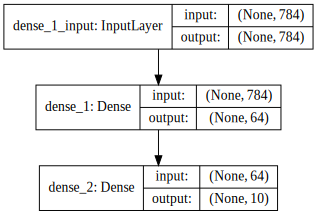

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi =70).create(prog='dot', format='svg'))

3-4 소스코드

In [ ]:
from keras.models import load_model

model.save('mnist_mlp_model .h5')
model = load_model('mnist_mlp_model .h5')